## Create Latitute and Longitude combinations ##

In [47]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [49]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [50]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [51]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

## Import Dependencies, and Initialize an Empty List and Counters ###

In [52]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [53]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=acaab747401397067ebb377d664bbb0f


In [54]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [55]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [56]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval         ")
print("---------------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Conver the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       
        # Append the city information into the city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # If an error is experience, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------------------")
print("Data Retrieval Complete            ")
print("-----------------------------------------")

Beginning Data Retrieval         
---------------------------------------
Processing Record 1 of Set 1 | zhigansk
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | novyy urengoy
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | zhanatas
City not found. Skipping...
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | jacareacanga
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | mentok
City not found. Skipping...
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | chapais
Processing 

Processing Record 35 of Set 4 | umm lajj
Processing Record 36 of Set 4 | grand gaube
Processing Record 37 of Set 4 | cravo norte
Processing Record 38 of Set 4 | ordu
Processing Record 39 of Set 4 | killarney
Processing Record 40 of Set 4 | sakakah
Processing Record 41 of Set 4 | istok
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | hualmay
Processing Record 46 of Set 4 | puerto escondido
Processing Record 47 of Set 4 | goma
Processing Record 48 of Set 4 | narsaq
Processing Record 49 of Set 4 | puerto vallarta
Processing Record 50 of Set 4 | yanan
City not found. Skipping...
Processing Record 1 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 5 | raymond
Processing Record 3 of Set 5 | baiao
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | havoysund
Processing Record 6 of Set 5 | ust-maya
Processing Record 7 of Set 5 | leni

City not found. Skipping...
Processing Record 23 of Set 8 | genc
Processing Record 24 of Set 8 | honiara
Processing Record 25 of Set 8 | malwan
City not found. Skipping...
Processing Record 26 of Set 8 | antalaha
Processing Record 27 of Set 8 | cabo san lucas
Processing Record 28 of Set 8 | date
Processing Record 29 of Set 8 | baghdad
Processing Record 30 of Set 8 | fairbanks
Processing Record 31 of Set 8 | saint anthony
Processing Record 32 of Set 8 | kolosovka
Processing Record 33 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 34 of Set 8 | linxia
Processing Record 35 of Set 8 | iquitos
Processing Record 36 of Set 8 | egvekinot
Processing Record 37 of Set 8 | port blair
Processing Record 38 of Set 8 | lakatoro
Processing Record 39 of Set 8 | sola
Processing Record 40 of Set 8 | praia da vitoria
Processing Record 41 of Set 8 | atar
Processing Record 42 of Set 8 | kaputa
Processing Record 43 of Set 8 | temaraia
City not found. Skipping...
Processing Record 44 of Set 8

City not found. Skipping...
Processing Record 8 of Set 12 | bathsheba
Processing Record 9 of Set 12 | mlimba
Processing Record 10 of Set 12 | pangody
Processing Record 11 of Set 12 | brive-la-gaillarde
Processing Record 12 of Set 12 | russell
Processing Record 13 of Set 12 | kuryk
Processing Record 14 of Set 12 | khovu-aksy
Processing Record 15 of Set 12 | snyder
Processing Record 16 of Set 12 | piacabucu
Processing Record 17 of Set 12 | sioux lookout
Processing Record 18 of Set 12 | college
Processing Record 19 of Set 12 | omsukchan
Processing Record 20 of Set 12 | boende
Processing Record 21 of Set 12 | rincon
Processing Record 22 of Set 12 | tura
Processing Record 23 of Set 12 | necochea
Processing Record 24 of Set 12 | bongandanga
Processing Record 25 of Set 12 | nome
Processing Record 26 of Set 12 | hami
Processing Record 27 of Set 12 | svidnik
Processing Record 28 of Set 12 | canutama
Processing Record 29 of Set 12 | ngunguru
Processing Record 30 of Set 12 | kuminskiy
Processing 

In [57]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhigansk,66.7697,123.3711,-7.53,100,95,9.69,RU,2021-11-11 01:54:12
1,Mount Gambier,-37.8333,140.7667,60.71,63,90,17.27,AU,2021-11-11 01:54:12
2,Rikitea,-23.1203,-134.9692,73.47,84,85,15.30,PF,2021-11-11 01:54:12
3,Castro,-24.7911,-50.0119,56.10,97,100,9.13,BR,2021-11-11 01:54:13
4,Busselton,-33.6500,115.3333,66.04,42,4,5.93,AU,2021-11-11 01:54:13
5,Novyy Urengoy,66.0833,76.6333,2.52,99,87,7.27,RU,2021-11-11 01:54:14
6,Dikson,73.5069,80.5464,-3.57,99,100,13.24,RU,2021-11-11 01:54:14
7,Atuona,-9.8000,-139.0333,78.03,74,8,15.03,PF,2021-11-11 01:54:15
8,Bambous Virieux,-20.3428,57.7575,73.65,83,40,6.91,MU,2021-11-11 01:54:15
9,Carnarvon,-24.8667,113.6333,78.87,25,0,17.27,AU,2021-11-11 01:54:16


In [58]:
#Reorder columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [59]:
city_data_df[new_column_order]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhigansk,66.7697,123.3711,-7.53,100,95,9.69,RU,2021-11-11 01:54:12
1,Mount Gambier,-37.8333,140.7667,60.71,63,90,17.27,AU,2021-11-11 01:54:12
2,Rikitea,-23.1203,-134.9692,73.47,84,85,15.30,PF,2021-11-11 01:54:12
3,Castro,-24.7911,-50.0119,56.10,97,100,9.13,BR,2021-11-11 01:54:13
4,Busselton,-33.6500,115.3333,66.04,42,4,5.93,AU,2021-11-11 01:54:13


In [114]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [61]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [62]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1636595967.8841057

## Plot Latitude vs. Max Temperature ###

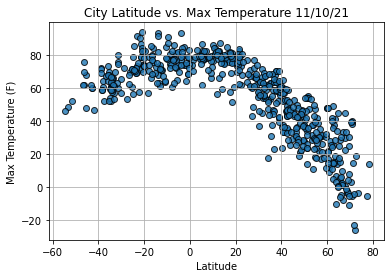

In [63]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Plot Latitude vs, Humidity ###

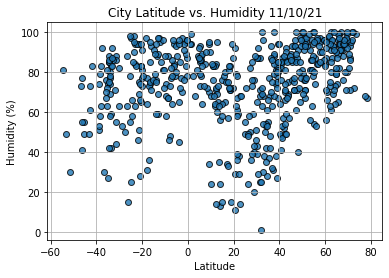

In [64]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.

## Plot Latitude vs Cloudiness ###

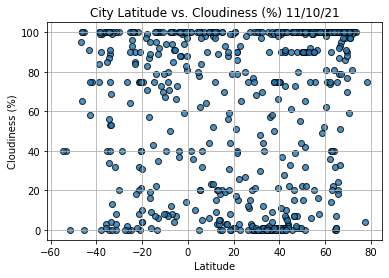

In [65]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Plot City Latitude vs Wind Speed ###

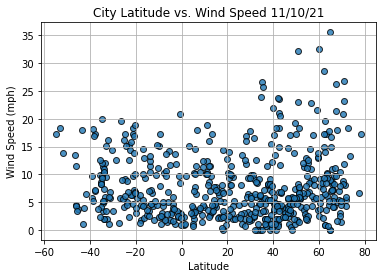

In [66]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Linear regression ##

In [75]:
# Import linregress
from scipy.stats import linregress

In [88]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r_value is {r_value:.2f}")

## Create the hemisphere DataFrame ###

In [89]:
# Apply loc method to city_data_df atthe index 13.
index13 = city_data_df.loc[13]
index13

City                   Georgetown
Lat                        5.4112
Lng                      100.3354
Max Temp                    82.33
Humidity                       85
Cloudiness                     20
Wind Speed                    3.0
Country                        MY
Date          2021-11-11 01:54:19
Name: 13, dtype: object

In [90]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
545     True
546     True
547     True
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [91]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhigansk,66.7697,123.3711,-7.53,100,95,9.69,RU,2021-11-11 01:54:12
5,Novyy Urengoy,66.0833,76.6333,2.52,99,87,7.27,RU,2021-11-11 01:54:14
6,Dikson,73.5069,80.5464,-3.57,99,100,13.24,RU,2021-11-11 01:54:14
13,Georgetown,5.4112,100.3354,82.33,85,20,3.00,MY,2021-11-11 01:54:19
14,Butaritari,3.0707,172.7902,83.03,68,10,15.19,KI,2021-11-11 01:54:19
...,...,...,...,...,...,...,...,...,...
545,Mansehra,34.3333,73.2000,51.26,35,0,6.31,PK,2021-11-11 01:56:11
546,Sangar,63.9242,127.4739,-10.25,100,100,0.78,RU,2021-11-11 01:59:06
547,Lompoc,34.6391,-120.4579,68.52,61,0,24.00,US,2021-11-11 01:59:06
548,Chik,54.9928,82.4311,33.55,100,90,11.18,RU,2021-11-11 01:59:07


In [92]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhigansk,66.7697,123.3711,-7.53,100,95,9.69,RU,2021-11-11 01:54:12
5,Novyy Urengoy,66.0833,76.6333,2.52,99,87,7.27,RU,2021-11-11 01:54:14
6,Dikson,73.5069,80.5464,-3.57,99,100,13.24,RU,2021-11-11 01:54:14
13,Georgetown,5.4112,100.3354,82.33,85,20,3.00,MY,2021-11-11 01:54:19
14,Butaritari,3.0707,172.7902,83.03,68,10,15.19,KI,2021-11-11 01:54:19


In [93]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere ###

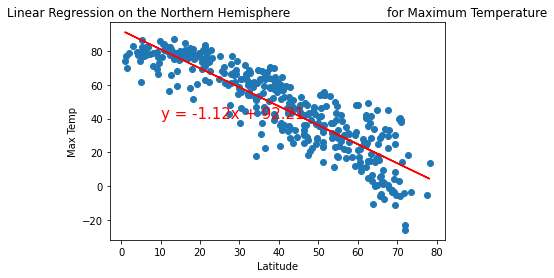

The r_value is -0.88


In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere ###

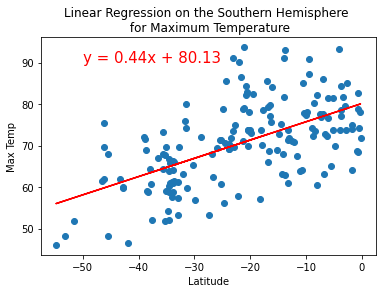

The r_value is 0.59


In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Max Temp',(-50,90))

## Linear Regression on the Percent Humidity for the Northern Hemisphere ###

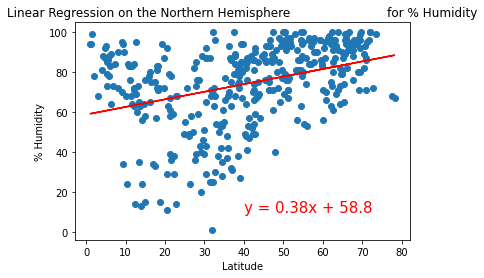

The r_value is 0.36


In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

## Linear Regression on the Percent Humidity for the Southern Hemisphere ###

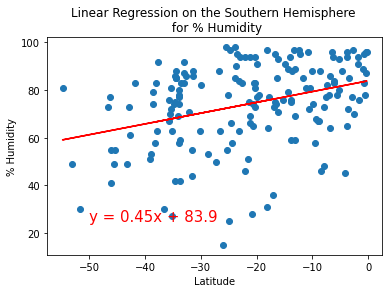

The r_value is 0.34


In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title =     'Linear Regression on the Southern Hemisphere \n for % Humidity'
# Call the function.
plot_linear_regression(x_values, y_values,title, '% Humidity',(-50,25))

## Find the Correlation Between Latitude and Percent Cloudiness ##

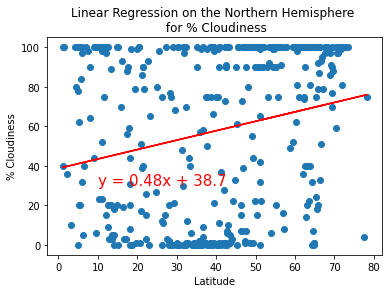

The r_value is 0.23


In [102]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title =   'Linear Regression on the Northern Hemisphere \n for % Cloudiness'
# Call the function.
plot_linear_regression(x_values, y_values,title, '% Cloudiness',(10,30))

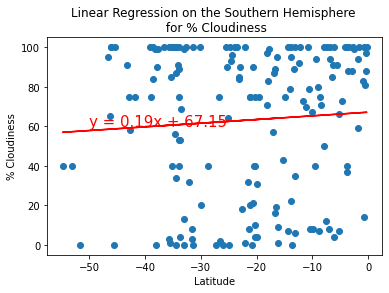

The r_value is 0.07


In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title =   'Linear Regression on the Southern Hemisphere \n for % Cloudiness'
# Call the function.
plot_linear_regression(x_values, y_values,title, '% Cloudiness',(-50,60))

## Linear Regression on the Wind Speed for the Northern Hemisphere

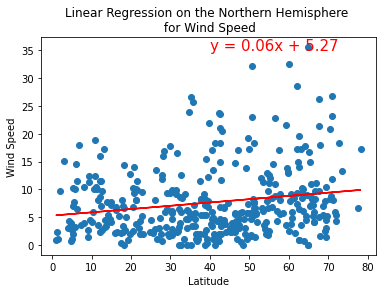

The r_value is 0.19


In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title =   'Linear Regression on the Northern Hemisphere \n for Wind Speed'
# Call the function.
plot_linear_regression(x_values, y_values,title,'Wind Speed',(40,35))

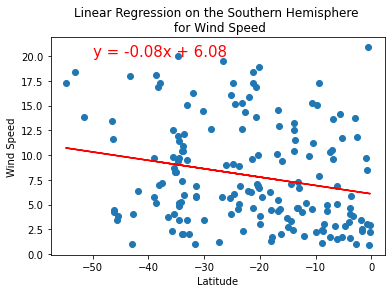

The r_value is -0.22


In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title ='Linear Regression on the Southern Hemisphere \n for Wind Speed'
# Call the function.
plot_linear_regression(x_values, y_values,title, 'Wind Speed',(-50,20))